In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log, pow

对lena灰度图片进行线性点运算，依次输出原灰度图与四种不同类别运算之后的灰度图对比（左边为原灰度图），点运算公式为s = ar + b，四个运算依次是a = 0.1 , b = 1 , 输出灰度压缩；a = 1 , b = 0 , 输出灰度不变；a = 1.5 , b = 0 , 输出灰度扩展，整体变亮；a = 0.1 , b = 0 , 输出灰度压缩，整体变暗。

a = 0.1 , b = 1 , 输出灰度压缩


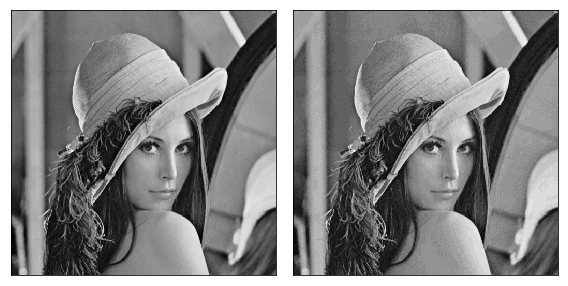

a = 1 , b = 0 , 输出灰度不变


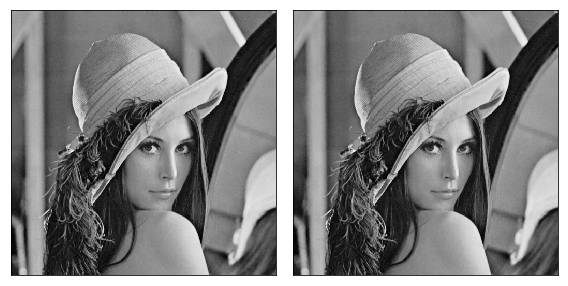

a = 1.5 , b = 0 , 输出灰度扩展，整体变亮


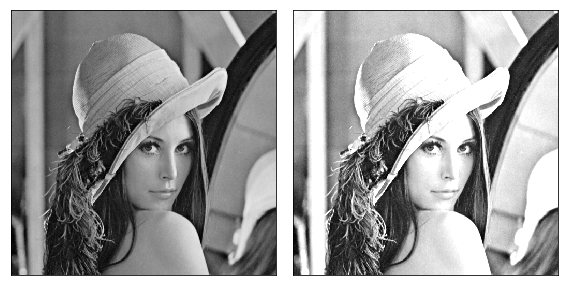

a = 0.1 , b = 0 , 输出灰度压缩，整体变暗


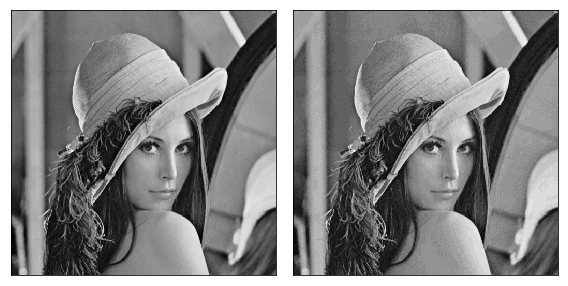

In [3]:
def linear(a,b,img):
    height, width = img.shape[:2]
    new_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if int(a*img[i][j]+b) > 255:
                new_img[i][j] = 255
            else:
                new_img[i][j] = int(a*img[i][j]+b)
    return new_img

img = cv2.imread('lena.jpg',0)

# 0 < a < 1 , b > 0 , 输出灰度压缩
print('a = 0.1 , b = 1 , 输出灰度压缩')
linear_img1 = linear(0.1,1,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(linear_img1, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# a = 1 , b = 0 , 输出灰度不变
print('a = 1 , b = 0 , 输出灰度不变')
linear_img2 = linear(1,0,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(linear_img2, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# a > 1 , b = 0, 输出灰度扩展，整体变亮
print('a = 1.5 , b = 0 , 输出灰度扩展，整体变亮')
linear_img3 = linear(1.5,1,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(linear_img3, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# 0 < a < 1 , b = 0 , 输出灰度压缩，整体变暗
print('a = 0.1 , b = 0 , 输出灰度压缩，整体变暗')
linear_img4 = linear(0.1,0,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(linear_img4, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


对lena灰度图片进行分段线性点运算，输出原灰度图处理后的灰度图对比（左边为原灰度图），原灰度图灰度范围为[0,255],变换后的灰度范围[0,210]。

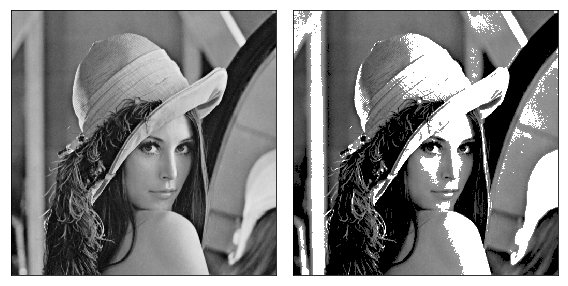

In [4]:
def segmented_linear(a,b,c,d,mg,img):
    height, width = img.shape[:2]
    new_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if img[i][j] < a:
                new_img[i][j] = int(c / a) * img[i][j]
            elif img[i][j] < b:
                new_img[i][j] = int((d-c) / (b-a)) * (img[i][j] - a) + c
            else:
                new_img[i][j] = int((mg - d) / (255 - b)) * (img[i][j] - b) + d
    return new_img


img = cv2.imread('lena.jpg',0)
segmented_img = segmented_linear(89,165,30,180,210,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(segmented_img, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


对lena灰度图片进行非线性点运算——对数变换，输出原灰度图处理后的灰度图对比（左边为原灰度图），变换公式为s=clog(1+r),此处取c=1。

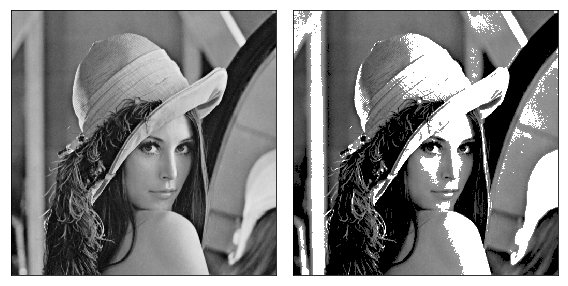

In [5]:
def log_trans(c,img):
    height, width = img.shape[:2]
    new_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            new_img[i][j] = int(c * log(1 + img[i][j]))
    return new_img


img = cv2.imread('lena.jpg',0)
log_img = log_trans(1,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(segmented_img, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

对lena灰度图片进行非线性点运算——幂次变换，输出原灰度图处理后的灰度图对比（左边为原灰度图），变换公式为s=cr^γ,此处取c=1,γ=0.4以及c=1,γ=2两组变换对比。

c=1,γ=0.4


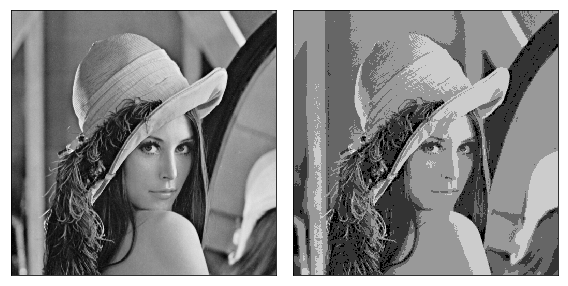

c=1,γ=2


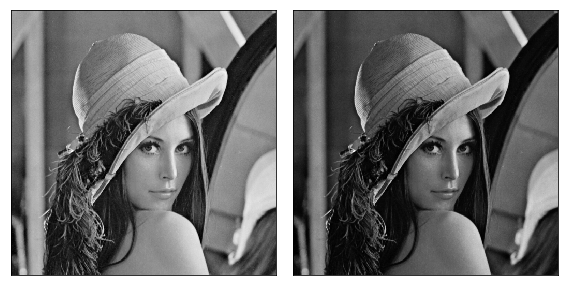

In [6]:
def exp_trans(c,γ,img):
    height, width = img.shape[:2]
    new_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            new_img[i][j] = int(c * pow(img[i][j],γ))
    return new_img

#0 < γ < 1,加亮、减暗图像
print('c=1,γ=0.4')
img = cv2.imread('lena.jpg',0)
exp_img1 = exp_trans(1,0.4,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(exp_img1, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#γ > 1,加暗、减亮图像
print('c=1,γ=2')
img = cv2.imread('lena.jpg',0)
exp_img2 = exp_trans(1,2,img)
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(exp_img2, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

